In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")

In [2]:
tools = pd.read_parquet('../data/tools.parquet')

In [3]:
tools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286042 entries, 0 to 286041
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   request_id               286042 non-null  object 
 1   request_block            286042 non-null  object 
 2   prompt_request           286042 non-null  object 
 3   tool                     286042 non-null  object 
 4   nonce                    286042 non-null  object 
 5   trader_address           286042 non-null  object 
 6   deliver_block            286042 non-null  object 
 7   error                    286042 non-null  int64  
 8   error_message            3147 non-null    object 
 9   prompt_response          285564 non-null  object 
 10  mech_address             285656 non-null  object 
 11  p_yes                    282895 non-null  float64
 12  p_no                     282895 non-null  float64
 13  confidence               282895 non-null  float64
 14  info

In [4]:
tools.tool.value_counts()

tool
claude-prediction-offline                    110152
claude-prediction-online                      46686
prediction-offline-sme                        43917
prediction-request-reasoning                  41645
prediction-request-rag-claude                 25431
prediction-offline                             6215
prediction-online                              2289
prediction-online-sme                          2203
prediction-request-rag                         2172
prediction-request-reasoning-claude            2025
prediction-url-cot-claude                      1992
superforcaster                                 1080
stabilityai-stable-diffusion-v1-6               119
stabilityai-stable-diffusion-xl-1024-v1-0       116
Name: count, dtype: int64

In [5]:
tools_superforcaster = tools.loc[tools["tool"]=="superforcaster"]

In [6]:
tools_superforcaster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 25 to 285910
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   request_id               1080 non-null   object 
 1   request_block            1080 non-null   object 
 2   prompt_request           1080 non-null   object 
 3   tool                     1080 non-null   object 
 4   nonce                    1080 non-null   object 
 5   trader_address           1080 non-null   object 
 6   deliver_block            1080 non-null   object 
 7   error                    1080 non-null   int64  
 8   error_message            0 non-null      object 
 9   prompt_response          1080 non-null   object 
 10  mech_address             1080 non-null   object 
 11  p_yes                    1080 non-null   float64
 12  p_no                     1080 non-null   float64
 13  confidence               1080 non-null   float64
 14  info_utility             1

In [7]:
len(list(tools_superforcaster.trader_address.unique()))

219

In [9]:
tools_superforcaster.head()

request_id request_block  \
25    7954746357421406217625419969909404056225427053...      36701081   
487   3893466766708161182364759698039339419255094338...      36811522   
1200  7937905446830497137329572363351508546160463954...      36759585   
2999  7132897945614190217838117925907875446836020321...      36702802   
3104  8199746255688176940073355030356696899510084324...      36795210   

                                         prompt_request            tool  \
25    Please take over the role of a Data Scientist ...  superforcaster   
487   Please take over the role of a Data Scientist ...  superforcaster   
1200  Please take over the role of a Data Scientist ...  superforcaster   
2999  Please take over the role of a Data Scientist ...  superforcaster   
3104  Please take over the role of a Data Scientist ...  superforcaster   

                                     nonce  \
25    1b609b7e-e0d2-4bb8-ad6b-7d0e6e6610b5   
487   80f86c11-29b7-480d-a73d-a1cc2738c911   
1200  544f9e46-1293-4d61-abcf-15eae6406281   
2999  a8e456c8-b87a-41fd-ba17-a69d9b2dc195   
3104  c4163205-eef9-43b5-8e3f-b879f1e69d7b   

                                  trader_address deliver_block  error  \
25    0x8dd0f0f64e575a356545d9ed096122a1887e64bf      36701099      0   
487   0x6f2f057275f7072203b70aa4212d7d2448a2b16f      36811532      0   
1200  0xea1f46f9ea5bb3119a94bff2e4b95aaf8a93f594      36759592      0   
2999  0xacb24b20805c6e475d2c17edb2a997c1ba47de79      36702815      0   
3104  0xb2912a22ee91272861931b693c434d420610abfe      36795222      0   

     error_message                                    prompt_response  ...  \
25            None  \nYou are an advanced AI system which has been...  ...   
487           None  \nYou are an advanced AI system which has been...  ...   
1200          None  \nYou are an advanced AI system which has been...  ...   
2999          None  \nYou are an advanced AI system which has been...  ...   
3104          None  \nYou are an advanced AI system which has been...  ...   

     confidence  info_utility  vote  win_probability  market_creator  \
25          0.6           0.4    No             0.70      quickstart   
487         0.8           0.3    No             0.99      quickstart   
1200        0.6           0.4    No             0.70      quickstart   
2999        0.6           0.4    No             0.70      quickstart   
3104        0.6           0.4    No             0.70      quickstart   

                                                  title  currentAnswer  \
25    Will any new human rights organizations public...            Yes   
487   Will any official statement from Russia confir...            Yes   
1200  Will the COP29 summit in Baku result in any ne...            Yes   
2999  Will any of the Caspian Sea countries publicly...             No   
3104  Will the Brazilian government announce a forma...           None   

             request_time request_month_year request_month_year_week  
25    2024-10-26 12:40:25            2024-10   2024-10-21/2024-10-27  
487   2024-11-02 03:18:25            2024-11   2024-10-28/2024-11-03  
1200  2024-10-30 00:44:50            2024-10   2024-10-28/2024-11-03  
2999  2024-10-26 15:09:35            2024-10   2024-10-21/2024-10-27  
3104  2024-11-01 03:54:10            2024-11   2024-10-28/2024-11-03  

[5 rows x 23 columns]

In [10]:
tools_superforcaster.market_creator.value_counts()

market_creator
quickstart    944
pearl         136
Name: count, dtype: int64

<Axes: xlabel='vote', ylabel='currentAnswer'>

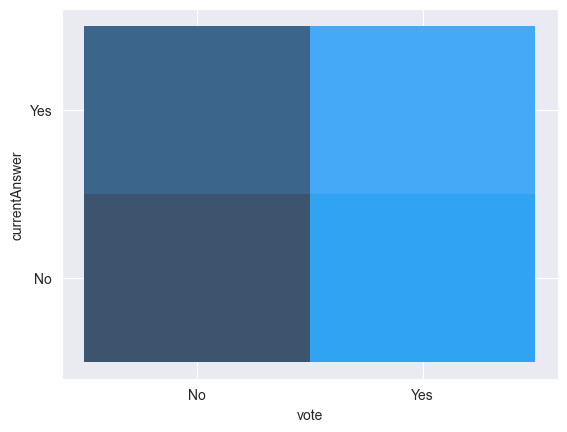

In [13]:
sns.histplot(tools_superforcaster, x="vote", y="currentAnswer")

<Axes: xlabel='currentAnswer', ylabel='vote'>

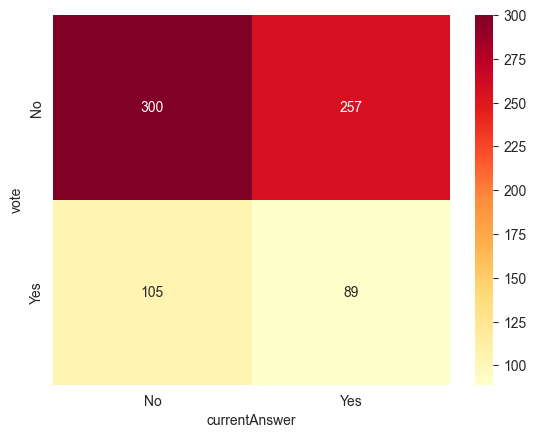

In [14]:
sns.heatmap(pd.crosstab(tools_superforcaster['vote'], tools_superforcaster['currentAnswer']), 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd')

In [8]:
tools_superforcaster.error.value_counts()

error
0    1080
Name: count, dtype: int64

In [6]:
tools_errors = tools.loc[tools["error"]==1]

In [7]:
tools_errors.head()

request_id request_block  \
86   4881674922867639641311571037228957716478871650...      35999601   
150  1635603471143500367687547686004256739020540606...      36085486   
171  9605346928838243745282196096485039029835957400...      36153230   
302  8665095948962365369308240696967816065773728349...      36242586   
320  8760585200747573871316640694310284358194695510...      36031841   

                                        prompt_request  \
86   Please take over the role of a Data Scientist ...   
150  Please take over the role of a Data Scientist ...   
171  Please take over the role of a Data Scientist ...   
302  Please take over the role of a Data Scientist ...   
320  Please take over the role of a Data Scientist ...   

                             tool                                 nonce  \
86   prediction-request-reasoning  717e6b3a-fb8e-46b8-b08f-09b7688bd3f5   
150  prediction-request-reasoning  906015ba-4b44-4f16-865b-a78ec20fbd43   
171  prediction-request-reasoning  03dea35f-4e35-4d2d-9a6c-8f47e22fbeac   
302  prediction-request-reasoning  f359963a-595c-44e0-bd26-0e9d7fd7eb55   
320  prediction-request-reasoning  12bd33ad-88f6-4792-833b-b9bd22d8fe60   

                                 trader_address deliver_block  error  \
86   0x75c0366bd0cbc3db434fd117267e32f26c5ed857      35999619      1   
150  0x9373cb196a3542afa583a91db604aee92068552a      36085552      1   
171  0x61766a46659b67bbda5484bba45e524ccc652ee4      36153243      1   
302  0x839eaee319420e6dc83383bbb41fce4f8b0bb9aa      36242602      1   
320  0x1d942103400c1f1657dcbffd5e08904787ea936b      36031861      1   

              error_message prompt_response  ... confidence  info_utility  \
86   Response parsing error                  ...        NaN           NaN   
150  Response parsing error            None  ...        NaN           NaN   
171  Response parsing error                  ...        NaN           NaN   
302  Response parsing error                  ...        NaN           NaN   
320  Response parsing error                  ...        NaN           NaN   

     vote  win_probability  market_creator  \
86   None              NaN      quickstart   
150  None              NaN      quickstart   
171  None              NaN      quickstart   
302  None              NaN      quickstart   
320  None              NaN      quickstart   

                                                 title  currentAnswer  \
86   Will Jalen Ramsey remain the highest-paid corn...            Yes   
150  Will the DNA-based storage technology develope...             No   
171  Will the DJI Air 3S drone be launched on or by...             No   
302  Will New York Mayor Eric Adams resign due to t...             No   
320  Will the Miami Dolphins win their game on 18 S...             No   

            request_time request_month_year request_month_year_week  
86   2024-09-14 16:36:10            2024-09   2024-09-09/2024-09-15  
150  2024-09-19 19:04:55            2024-09   2024-09-16/2024-09-22  
171  2024-09-23 19:36:20            2024-09   2024-09-23/2024-09-29  
302  2024-09-29 03:27:40            2024-09   2024-09-23/2024-09-29  
320  2024-09-16 14:30:55            2024-09   2024-09-16/2024-09-22  

[5 rows x 23 columns]

In [8]:
tools_errors.market_creator.value_counts()

market_creator
quickstart    2581
pearl          291
Name: count, dtype: int64

In [9]:
tools_errors_pearl = tools_errors.loc[tools_errors["market_creator"]=="pearl"]

In [10]:
tools_errors_pearl.tool.value_counts()

tool
prediction-request-reasoning           173
prediction-offline-sme                  83
prediction-request-reasoning-claude     20
prediction-request-rag                   7
prediction-request-rag-claude            5
prediction-online-sme                    2
claude-prediction-offline                1
Name: count, dtype: int64

In [11]:
tools_errors_pearl_reasoning = tools_errors_pearl.loc[tools_errors_pearl["tool"]=="prediction-request-reasoning"]

In [12]:
tools_errors_pearl_reasoning.error_message.value_counts()

error_message
Response parsing error    173
Name: count, dtype: int64

In [13]:
tools_errors_pearl_reasoning.request_month_year_week.value_counts()

request_month_year_week
2024-08-19/2024-08-25    54
2024-10-07/2024-10-13    53
2024-09-02/2024-09-08    33
2024-09-23/2024-09-29    12
2024-09-09/2024-09-15    12
2024-08-26/2024-09-01     5
2024-09-30/2024-10-06     4
Name: count, dtype: int64

In [14]:
tools_errors_pearl_reasoning_oct = tools_errors_pearl_reasoning.loc[tools_errors_pearl_reasoning["request_month_year_week"]=="2024-10-07/2024-10-13"]

In [15]:
tools_errors_pearl_reasoning_oct.head()

request_id request_block  \
1301  6096315197620058968806130972169678143719505006...      36413260   
4446  5354600326067223816020518930816563773467758113...      36403643   
4482  6150779611250311931991788339674513841446857824...      36490063   
5281  2629357539419898379977886858224971150345341996...      36396729   
5978  6657538643069097666675831403759282242594505545...      36405500   

                                         prompt_request  \
1301  Please take over the role of a Data Scientist ...   
4446  Please take over the role of a Data Scientist ...   
4482  Please take over the role of a Data Scientist ...   
5281  Please take over the role of a Data Scientist ...   
5978  Please take over the role of a Data Scientist ...   

                              tool                                 nonce  \
1301  prediction-request-reasoning  f2016229-4284-4178-ba31-6d3d79c08db2   
4446  prediction-request-reasoning  c74f8eb6-5570-4258-b86b-6e92eca1a09b   
4482  prediction-request-reasoning  3bb89890-6b83-4788-94f8-e7eacf6ea121   
5281  prediction-request-reasoning  858c4497-836e-43e8-b234-868d3d542f0d   
5978  prediction-request-reasoning  cb9b0663-3eea-43ec-b791-43f3d5946f91   

                                  trader_address deliver_block  error  \
1301  0x04430ebfb7d088960233b7353cb4cefb528dc31e      36413276      1   
4446  0x04430ebfb7d088960233b7353cb4cefb528dc31e      36403657      1   
4482  0x8069ea45a18910fa493a6a736438971b0e59ec9b      36490078      1   
5281  0x04430ebfb7d088960233b7353cb4cefb528dc31e      36396742      1   
5978  0x04430ebfb7d088960233b7353cb4cefb528dc31e      36405513      1   

               error_message prompt_response  ... confidence  info_utility  \
1301  Response parsing error                  ...        NaN           NaN   
4446  Response parsing error                  ...        NaN           NaN   
4482  Response parsing error                  ...        NaN           NaN   
5281  Response parsing error                  ...        NaN           NaN   
5978  Response parsing error                  ...        NaN           NaN   

      vote  win_probability  market_creator  \
1301  None              NaN           pearl   
4446  None              NaN           pearl   
4482  None              NaN           pearl   
5281  None              NaN           pearl   
5978  None              NaN           pearl   

                                                  title  currentAnswer  \
1301  Will Rivian produce more electric vehicles in ...             No   
4446  Will the Dyson WashG1 wet floor cleaner reach ...             No   
4482  Will Biden speak to Netanyahu about Iran retal...            Yes   
5281  Will the Dyson WashG1 wet floor cleaner reach ...             No   
5978  Will Rivian produce more electric vehicles in ...             No   

             request_time request_month_year request_month_year_week  
1301  2024-10-09 07:16:50            2024-10   2024-10-07/2024-10-13  
4446  2024-10-08 17:32:55            2024-10   2024-10-07/2024-10-13  
4482  2024-10-13 20:56:30            2024-10   2024-10-07/2024-10-13  
5281  2024-10-08 07:38:25            2024-10   2024-10-07/2024-10-13  
5978  2024-10-08 20:10:45            2024-10   2024-10-07/2024-10-13  

[5 rows x 23 columns]

In [16]:
tools_errors_pearl_reasoning_oct.title.value_counts()

title
Will Rivian produce more electric vehicles in 2024 than it did in 2023 by 11 October 2024?                     27
Will the Dyson WashG1 wet floor cleaner reach a sales target of 500,000 units in the US by 10 October 2024?    25
Will Biden speak to Netanyahu about Iran retaliation on 16 October 2024?                                        1
Name: count, dtype: int64

In [17]:
tools_errors_pearl_reasoning_oct.groupby(["title","trader_address"])["request_id"].count()

title                                                                                                        trader_address                            
Will Biden speak to Netanyahu about Iran retaliation on 16 October 2024?                                     0x8069ea45a18910fa493a6a736438971b0e59ec9b     1
Will Rivian produce more electric vehicles in 2024 than it did in 2023 by 11 October 2024?                   0x032533005f65026fa7f360ff9a211bc94315325d     5
                                                                                                             0x04430ebfb7d088960233b7353cb4cefb528dc31e    18
                                                                                                             0x4b9e1890640e5f56f7fdc580347c938aaab56c25     1
                                                                                                             0x75c10935141d740b71e1763aa6a3139643754655     1
                                                          

In [18]:
target = tools_errors_pearl_reasoning_oct.loc[tools_errors_pearl_reasoning_oct["trader_address"]=="0x04430ebfb7d088960233b7353cb4cefb528dc31e"]
target.head()

request_id request_block  \
1301   6096315197620058968806130972169678143719505006...      36413260   
4446   5354600326067223816020518930816563773467758113...      36403643   
5281   2629357539419898379977886858224971150345341996...      36396729   
5978   6657538643069097666675831403759282242594505545...      36405500   
13521  5425044058976052235962273954205049658875702880...      36400070   

                                          prompt_request  \
1301   Please take over the role of a Data Scientist ...   
4446   Please take over the role of a Data Scientist ...   
5281   Please take over the role of a Data Scientist ...   
5978   Please take over the role of a Data Scientist ...   
13521  Please take over the role of a Data Scientist ...   

                               tool                                 nonce  \
1301   prediction-request-reasoning  f2016229-4284-4178-ba31-6d3d79c08db2   
4446   prediction-request-reasoning  c74f8eb6-5570-4258-b86b-6e92eca1a09b   
5281   prediction-request-reasoning  858c4497-836e-43e8-b234-868d3d542f0d   
5978   prediction-request-reasoning  cb9b0663-3eea-43ec-b791-43f3d5946f91   
13521  prediction-request-reasoning  f1d2af5e-b1ab-4818-94b7-14f8d6e8c5a1   

                                   trader_address deliver_block  error  \
1301   0x04430ebfb7d088960233b7353cb4cefb528dc31e      36413276      1   
4446   0x04430ebfb7d088960233b7353cb4cefb528dc31e      36403657      1   
5281   0x04430ebfb7d088960233b7353cb4cefb528dc31e      36396742      1   
5978   0x04430ebfb7d088960233b7353cb4cefb528dc31e      36405513      1   
13521  0x04430ebfb7d088960233b7353cb4cefb528dc31e      36400080      1   

                error_message prompt_response  ... confidence  info_utility  \
1301   Response parsing error                  ...        NaN           NaN   
4446   Response parsing error                  ...        NaN           NaN   
5281   Response parsing error                  ...        NaN           NaN   
5978   Response parsing error                  ...        NaN           NaN   
13521  Response parsing error                  ...        NaN           NaN   

       vote  win_probability  market_creator  \
1301   None              NaN           pearl   
4446   None              NaN           pearl   
5281   None              NaN           pearl   
5978   None              NaN           pearl   
13521  None              NaN           pearl   

                                                   title  currentAnswer  \
1301   Will Rivian produce more electric vehicles in ...             No   
4446   Will the Dyson WashG1 wet floor cleaner reach ...             No   
5281   Will the Dyson WashG1 wet floor cleaner reach ...             No   
5978   Will Rivian produce more electric vehicles in ...             No   
13521  Will Rivian produce more electric vehicles in ...             No   

              request_time request_month_year request_month_year_week  
1301   2024-10-09 07:16:50            2024-10   2024-10-07/2024-10-13  
4446   2024-10-08 17:32:55            2024-10   2024-10-07/2024-10-13  
5281   2024-10-08 07:38:25            2024-10   2024-10-07/2024-10-13  
5978   2024-10-08 20:10:45            2024-10   2024-10-07/2024-10-13  
13521  2024-10-08 12:25:15            2024-10   2024-10-07/2024-10-13  

[5 rows x 23 columns]

In [22]:
# Step 1: Convert 'request_time' to datetime
target['request_time'] = pd.to_datetime(target['request_time'])

# Step 2: Extract only the date
# Option 1: Using .dt.date (results in Python date objects)
target['request_date'] = target['request_time'].dt.date

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_17275/2686300214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['request_time'] = pd.to_datetime(target['request_time'])
/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_17275/2686300214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['request_date'] = target['request_time'].dt.date


In [24]:
target.request_date.value_counts()

request_date
2024-10-08    29
2024-10-09    10
Name: count, dtype: int64

In [42]:
target.iloc[0]

request_id                 6096315197620058968806130972169678143719505006...
request_block                                                       36413260
prompt_request             Please take over the role of a Data Scientist ...
tool                                            prediction-request-reasoning
nonce                                   f2016229-4284-4178-ba31-6d3d79c08db2
trader_address                    0x04430ebfb7d088960233b7353cb4cefb528dc31e
deliver_block                                                       36413276
error                                                                      1
error_message                                         Response parsing error
prompt_response                                                             
mech_address                      0x5e1d1eb61e1164d5a50b28c575da73a29595dff7
p_yes                                                                    NaN
p_no                                                                     NaN

In [27]:
list_ids = target.request_id.values
list_ids[:10]

array(['60963151976200589688061309721696781437195050065672302545071004901874091643033',
       '53546003260672238160205189308165637734677581135389860768311962356510252085357',
       '26293575394198983799778868582249711503453419968199870418716975289164670157536',
       '66575386430690976666758314037592822425945055456424920638493080371011311687054',
       '5425044058976052235962273954205049658875702880324375176513486350978973220608',
       '67706664061213144510833774262887647102859606166941783706328234599690094513710',
       '98828025374278604837269142958136367369389242698175058646612841201042809221440',
       '79487665733109433701267761770671777455860068843765509767086476708116395574323',
       '37702190955051676132208606978682620139157915260199519916929970381323219753604',
       '39569294324786741974231872134377826545140874888007473009293927983710957931560'],
      dtype=object)

In [43]:
list_ids[11:20]

array(['90593985923458899196810962386588286156538155570078296690881210441404684587554',
       '68767283695784515860585993729057039088040186058017842377406754894591756511455',
       '30463708402138539553111489893542873324945145496769326313504030362000739912217',
       '107009206247715009517848578229257123443621203954825272856731050187387798698104',
       '1791452603581598622819765450305918309250605837452864609167229991453595349104',
       '83410164700209236856544326193231329461555897050465870148582616961224625051174',
       '18800709011076966851620908913623693327374337392203674994417817827748941031712',
       '52968186234915567486999518373725017068484409050337977059157445056559429258274',
       '25079816768578500534050631284042535400266565749897206799037169746242652065181'],
      dtype=object)

In [28]:
target[["request_id", "request_date"]]

request_id request_date
1301    6096315197620058968806130972169678143719505006...   2024-10-09
4446    5354600326067223816020518930816563773467758113...   2024-10-08
5281    2629357539419898379977886858224971150345341996...   2024-10-08
5978    6657538643069097666675831403759282242594505545...   2024-10-08
13521   5425044058976052235962273954205049658875702880...   2024-10-08
19109   6770666406121314451083377426288764710285960616...   2024-10-09
26394   9882802537427860483726914295813636736938924269...   2024-10-09
28451   7948766573310943370126776177067177745586006884...   2024-10-08
30496   3770219095505167613220860697868262013915791526...   2024-10-08
36292   3956929432478674197423187213437782654514087488...   2024-10-08
51084   8175211455282203482379491678632547763247823116...   2024-10-08
59234   9059398592345889919681096238658828615653815557...   2024-10-09
61875   6876728369578451586058599372905703908804018605...   2024-10-09
66420   3046370840213853955311148989354287332494514549...   2024-10-08
67950   1070092062477150095178485782292571234436212039...   2024-10-08
72643   1791452603581598622819765450305918309250605837...   2024-10-08
75088   8341016470020923685654432619323132946155589705...   2024-10-08
78791   1880070901107696685162090891362369332737433739...   2024-10-08
79145   5296818623491556748699951837372501706848440905...   2024-10-08
83216   2507981676857850053405063128404253540026656574...   2024-10-08
85167   7575008210195058310304416239166201007781878905...   2024-10-08
88188   9552646687631779229885168355150323079613443891...   2024-10-08
100246  4692241561430217878941029480346287939590785051...   2024-10-09
100677  7206378347489269040486803921098426780132051076...   2024-10-08
101088  1092955896466926617598161352358541141356344922...   2024-10-08
101210  1527068083956919475597593744421530347315167151...   2024-10-08
108656  1324300681984336956521266305617936389896556358...   2024-10-09
108846  8289032326759732887661005089261149134628471095...   2024-10-08
109312  5912452484774403202939990022063726888631215178...   2024-10-08
110341  6190847215316949218633078224850239375241342048...   2024-10-08
116511  1153012652040846748107002862035076676381200652...   2024-10-08
121108  1557391800733738917341431736907154545224724694...   2024-10-08
138827  2220225315128610064534249140893399020559732644...   2024-10-09
146315  1060705375579050874189318472528055944551818109...   2024-10-08
149805  5701187523179160021887695614981479044834603062...   2024-10-08
151939  6965041493166381160828548950817860788478600202...   2024-10-09
156075  1094553406895658377755024653190865186935248795...   2024-10-08
158713  2482181328413474980777782435770046521802662164...   2024-10-08
159533  7477199406563092998546889148948661086790369208...   2024-10-09

In [29]:
# Step 1: Convert 'request_time' to datetime
tools['request_time'] = pd.to_datetime(tools['request_time'])

# Step 2: Extract only the date
# Option 1: Using .dt.date (results in Python date objects)
tools['request_date'] = tools['request_time'].dt.date


In [31]:
tools.loc[tools["request_month_year_week"]=="2024-10-07/2024-10-13"][["request_id", "request_date"]]

request_id request_date
7       6000436570989704155944120385884952057858004900...   2024-10-11
11      1110041886165814728304049774267297117864784041...   2024-10-11
17      1540850207513454596143653889780703543734000659...   2024-10-12
32      7893228936705618570277338740495039782889689581...   2024-10-10
33      7526736795473306673180277838498078624434571449...   2024-10-08
...                                                   ...          ...
162083  8155539169659776751020900439047793303819631815...   2024-10-13
162093  4091897651903844948533305264746058547870099773...   2024-10-09
162094  1060448907408309804546320958065157755251608511...   2024-10-12
162109  4235777061025284573352646490318646198795416762...   2024-10-07
162111  5209142730053796928793404697801186735890129172...   2024-10-07

[20516 rows x 2 columns]

In [35]:
tools.request_date.value_counts()

request_date
2024-10-20    4616
2024-10-18    4474
2024-10-17    4180
2024-10-19    4093
2024-09-10    4018
              ... 
2024-09-21    1853
2024-08-29    1700
2024-09-15    1614
2024-08-22    1421
2024-10-21     742
Name: count, Length: 61, dtype: int64

In [37]:
print(tools['request_date'].dtype)

object


In [41]:
tools['request_date'] = pd.to_datetime(tools['request_date'])
oct_sample = tools.loc[(tools["request_date"]=="2024-10-08") & (tools["error"]!=1)]
oct_sample.request_id.values[:10]

array(['75267367954733066731802778384980786244345714492617935729431679575835641281777',
       '84777531641003257941101275192333838936553813208125088407536800860673481676974',
       '96220126533195686874770414750092684778689303224171939903636393563147529566805',
       '85111692869695695070820477101480929103128037048651644814553376046710657331686',
       '70955678141080262808382265854526736034962899352147754109605797381118648546015',
       '89888925059941001916258915191647589006859959225855447761356001840604632558824',
       '64072963113962902370586870420814897514043034924401758496712860053069476945214',
       '49558713491944943262949682898061227957325052054046197143378203615269796493658',
       '111138854287366484154634943297210669395092434185286519533898615765972894294967',
       '63485197917885194773892649042188753341615679859375446649536109613725800096903'],
      dtype=object)